# <center>DS PROJECT- IDENTIFYING FAKE FROM REAL NEWS 
<center> <font size="4"> Chen Moasis and Ariel Shirkani
    
------------------------------------------------------------------------------------


## <u>TABLE OF CONTENTS</u>
### **[STEP #1](#STEP1)-** Define the Problem and Identify Appropriate Research Questions

### **[STEP #2](#STEP2)-** Identify Data

### **[STEP #3](#STEP3)-** Preliminary Analysis and Data Refinement
   * [Boxplot](#Boxplot)- number of words in each article
   * [Histogram](#Histogram)- number of words in each article

### **[STEP #4](#STEP4)-** EDA and Visualization

### **[STEP #4.1](#STEP4.1)-** EDA on Data Before Cleaning
   * [Bar plot](#barfreq)- frequency of fake or real news
   * [Histogram](#RelativeHistogram)- relative frequency of fake or real news
   * [Scatterplot](#scatter)- number of words in fake vs. real news
   * [Bar plot](#barplotworddist)- word distribution (top 25 words)
   * [Word Cloud](#wordcloud)
   * [Donut Chart](#donut)
    
### **[STEP #4.2](#STEP4.2)-** EDA on Data After Cleaning
   * [Bar plot](#barplotworddist2)- word distribution (top 25 words)
   * [Word Cloud](#wordcloud2)
   * [Donut Chart](#donut2)
    
### **[STEP #5](#STEP5)-** Advanced Data Analysis
   * [Table](#modelstable)- performance evaluation of the different models
   * [Heat Maps](#heatmaps) of the different models
   * [What is the best model?](#bestmodel)
   * [Neural Networks Model](#neuralnetworks)
   * [Table](#modelstable2)- performance evaluation of the different models
   * [Heat Maps](#heatmaps2) of the different models

### **[STEP #6](#STEP6)-** Drawing Conclusions and Summary Report

## <font color='DarkBlue'>**STEP #1- Define the Problem and Identify Appropriate Research Questions:</font>** <a class="anchor" id="STEP1"></a>

Our world is flooded with information, and sometimes it is difficult to know if the media is telling us truth or lies. This phenomenon is often called "fake news".
Our research question in this project is: *is it possible, based on text, to classify articles into real and fake news?*

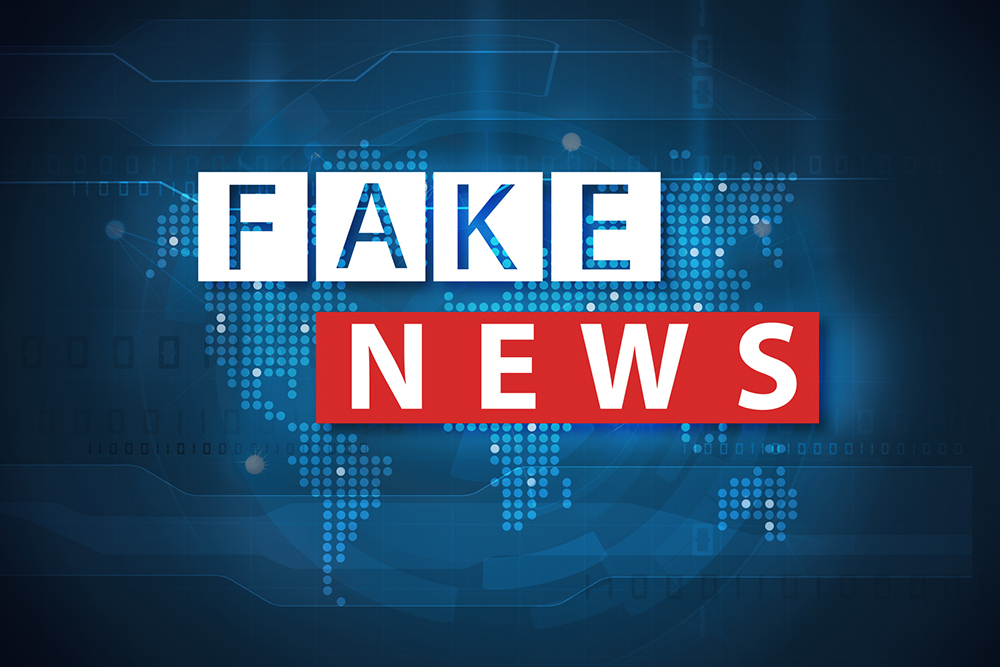

## <font color='1F3Ee1'>**STEP #2- Identify Data**</font> <a class="anchor" id="STEP2"></a>

Identify data on a significant scale (12738 rows * 4 columns = 50.952K) and purchase it from the Fox News website.
We will preform crawling on the fox news website for the *real* articles, and use a pre-made dataset for the *fake* ones.

In [1]:
# Import Packages
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
from lxml import html
#EDA
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline #?
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from flexitext import flexitext
from matplotlib.patches import FancyArrowPatch
import plotly.express as px
import string
import unidecode 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC
import scipy.sparse as sparse
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow_text as text
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import GridSearchCV
#plots
plt.rcParams.update({"font.family": "Corbel"})
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["xtick.labelcolor"] = "black"
plt.rcParams["ytick.labelcolor"] = "black"

In [2]:
#get links and titles of all articles on a page
def append_links_and_titles(article_links, titles, genre):
    while len(driver.find_elements(By.CSS_SELECTOR,"#wrapper > div > div.page-content > div > main > section.collection.collection-article-list.has-load-more > div > article"))<2800:
        try:
            if genre == "politics":
                show_more_btn = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div/div[2]/div/main/section[4]/footer/div/a")
            else: #entertainment or sports or  lifestyle
                show_more_btn = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div/div[2]/div/main/section[1]/footer/div/a")
            if show_more_btn.is_displayed()==True:
                show_more_btn.click()
                time.sleep(0.8)
        except:
            popup_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "pf-widget-close"))
            )
            if popup_element.is_displayed(): 
                popup_element.click()
        finally: 
            continue
    for l in range(1, 2749):                              #/html/body/div[1]/div/div/div/div[2]/div/main/section[1]/div/article[2]/div[2]/header/h4/a
        if genre == "politics":
            link_element = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div/div[2]/div/main/section[4]/div/article["+str(l)+"]/div[2]/header/h4/a")
        else:
            link_element = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div/div[2]/div/main/section[1]/div/article["+str(l)+"]/div[2]/header/h4/a")
        article_links.append(link_element.get_attribute("href"))
        titles.append(link_element.get_attribute("text"))
    return

In [3]:
#get text from single article
def get_article_content_lxml(link):
    try:
        response = requests.get(link)
    except:
        return ""
    tree = html.fromstring(response.content)
                            #/html/body/div[1]/div/div/div[2]/div[1]/main/article/div/div[1]/div
    paragraphs = tree.xpath("/html/body/div[1]/div/div/div[2]/div[1]/main/article/div/div[1]/div/*[self::p][not(a)]/text()")
                             
    article_content = ""
    for p in paragraphs:
        #if p.is_displayed()==True:
        article_content += p
    return article_content

In [4]:
#Setup for opening the web pages
PATH_CHEN = "D:\Program Files\chromedriver.exe"
PATH_ARIEL = "D:\chromeWebDriver\chromedriver.exe"
driver = webdriver.Chrome(PATH_ARIEL)

#append links and titles 
article_links = []
titles = []
base_link="https://www.foxnews.com/"
genres = ["politics", "entertainment", "sports", "lifestyle"]
for genre in  genres:
    link=base_link+genre
    driver.get(link)
    time.sleep(10)
    append_links_and_titles(article_links,titles, genre)

In [5]:
#append texts
texts=[]
for link in article_links:
    texts.append(get_article_content_lxml(link))

In [6]:
#remove videos from our lists, as they do not include text
for idx, link in enumerate(article_links):
    if link.find("/video/")!=-1:
        del article_links[idx]
        del titles[idx]

In [7]:
#finished the crawling process
driver.close()

In [8]:
#create dataframe of titles and links
df=pd.DataFrame({"Title":titles,"Link":article_links} )

In [9]:
#testing
df.tail()

In [10]:
#add the classification and text column and export to csv
df["Fake or Real News"]=["Real"]*len(df.axes[0])
df["Text"]=texts
df.to_csv('titles_and_links_and_texts.csv', index=False)

In [11]:
#testing (again)
df.tail()

In [12]:
#drop the links columns as it is no longer needed
df.drop(columns=["Link"],inplace=True)

In [13]:
df.columns

In [14]:
#work on the fake news dataset 
fake_news_df = pd.read_csv("Fake_news.csv")

In [15]:
fake_news_df.columns

In [16]:
#drop unneeded columns and use only part of the data
fake_news_df.drop(fake_news_df.iloc[:, 3:-1],axis = 1, inplace=True)
fake_news_df.columns
fake_news_df_partial=fake_news_df.iloc[:4000,:]

In [17]:
#change order of columns in df
column1 = 'Fake or Real News'
column2 = 'Text'
colnames = df.columns.tolist()
index1, index2 = colnames.index(column1), colnames.index(column2)
colnames[index2], colnames[index1] = colnames[index1], colnames[index2]
df = df[colnames]

In [18]:
fake_news_df_partial.columns = ['Title', 'Text', 'Fake or Real News']
fake_news_df_partial.columns

In [19]:
frames = [df, fake_news_df_partial]
dataset = pd.concat(frames)

In [20]:
shuffled = dataset.sample(frac=1)

In [21]:
shuffled.reset_index(drop=True, inplace=True)
shuffled
df=shuffled

In [22]:
num_of_words = [len(text.split()) for text in df["Text"]]
df.insert(2, 'Number of Words', num_of_words)
df.head()

In [23]:
#save to csv
df.to_csv('final_df.csv', index=False)

We have finished the crawling process and now we have a data frame.

## <font color='3377BD'>**STEP #3- Preliminary Analysis and Data Refinement**</font> <a class="anchor" id="STEP3"></a>

in this section we will transfer the "fake or real news" column from categorical to numerical values. In addition, we will handle missing data and remove duplicates (if needed). 

In [24]:
#REAL = 0, FAKE = 1
df["Fake or Real News"]=df["Fake or Real News"].astype('category')
replace_map = {'Real':0,'Fake':1}
df.replace(replace_map,inplace=True)

In [25]:
#Allegedly, there are no null values- no missing data!
df.info()

In [26]:
#Even though, we DO have some articles with zero content! Some links were faulty.
#we need to get rid of them.
for i in range(12738):
    if df.iloc[i,1]=="": #"" is an empty string
        df.iloc[i,1], df.iloc[i,2] = None, None
        
#Now that the null values can be identified, we"ll use 'dropna' to delete them
df = df.dropna()
df.Text.isnull().sum()

In [27]:
#Now we will handle duplications.
df_clean=df.drop_duplicates(subset=["Title"], ignore_index=True)
df_clean.drop_duplicates(subset=["Text"], ignore_index=True, inplace=True)
df_clean.shape

In [28]:
df=df_clean
df.shape

In [29]:
df.to_csv('final_df.csv', index=False)

In [30]:
df = pd.read_csv("final_df.csv")

#### Boxplot- number of words in each article<a class="anchor" id="Boxplot"></a>

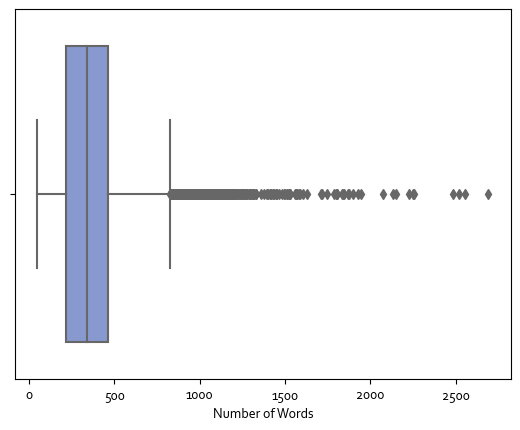

In [31]:
sns.boxplot(x=df["Number of Words"],color='#7c93db');

#### Histogram- number of words in each article<a class="anchor" id="Histogram"></a>

Text(0, 0.5, 'Frequency')

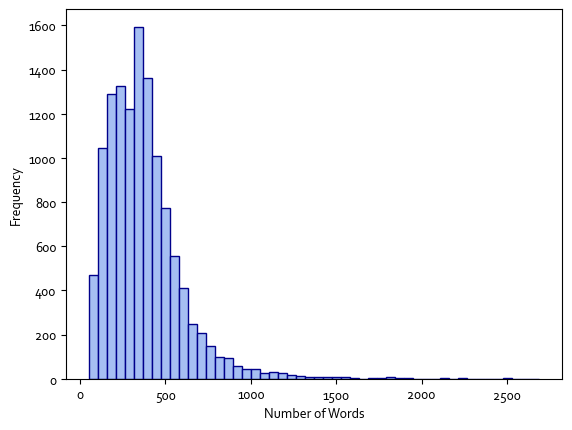

In [32]:
#Using a histogram, we can see that most articles are less than 1000 words.
plt.hist(df["Number of Words"], color='#a6bff2', edgecolor='DarkBlue', bins=50)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

In [33]:
#We will remove articles with less than 50 words
to_remove=list(df[df["Number of Words"]<50].index)
df.drop(index=to_remove,inplace=True)

## <font color= '89BBFE'>STEP #4- EDA and Visualization</font> <a class="anchor" id="STEP4"></a>

 In this section we will visualize our data using sklearn, seaborn and mathplotlib.

### <font color= '89BBFE'> **STEP #4.1-** EDA on Data Before Cleaning</font> <a class="anchor" id="STEP4.1"></a>

In [34]:
df.columns

Index(['Title', 'Text', 'Number of Words', 'Fake or Real News'], dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12166 entries, 0 to 12165
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              12166 non-null  object 
 1   Text               12166 non-null  object 
 2   Number of Words    12166 non-null  float64
 3   Fake or Real News  12166 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 380.3+ KB


In [36]:
df.describe(include="all")

Title  \
count                                               12166   
unique                                              12166   
top      Here’s What We ALL Need To Do If Trump Moves ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     Text  Number of Words  \
count                                               12166     12166.000000   
unique                                              12166              NaN   
top     Now that Special Counsel Robert Mueller is abo...              NaN   
freq                                                    1              NaN   
mean                                                  NaN       369.793934   
std                                                   NaN       220.311615   
min                                                   NaN        50.000000   
25%                                                   NaN       217.000000   
50%                                                   NaN       338.000000   
75%                                                   NaN       461.000000   
max                                                   NaN      2691.000000   

        Fake or Real News  
count        12166.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean             0.328703  
std              0.469761  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

#### Bar plot- frequency of fake or real news<a class="anchor" id="barfreq"></a>

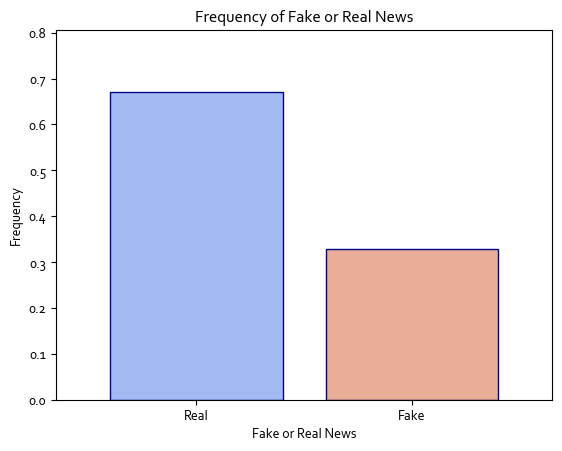

In [37]:
value_counts = df['Fake or Real News'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.set_title("Frequency of Fake or Real News")
ax.set_xlabel("Fake or Real News")
ax.set_ylabel("Frequency")
value_counts.plot(kind='bar', color = ['#a3bbf3', '#e9ae97'], edgecolor='DarkBlue', width=0.8)
ax.grid(visible=True, linestyle='',  dash_capstyle = 'projecting')
plt.margins(0.2)
ax.set_xticklabels(['Real', 'Fake'], rotation = 0)
plt.show()

In [38]:
print(df['Fake or Real News'].value_counts(normalize=False)) # 0 = Real, 1 = Fake
print("Normallized values:")
print(value_counts)

0    8167
1    3999
Name: Fake or Real News, dtype: int64
Normallized values:
0    0.671297
1    0.328703
Name: Fake or Real News, dtype: float64


#### Histogram- relative frequency of words in each article<a class="anchor" id="RelativeHistogram"></a>

The maximum number of words is: 2691
The minimum number of words is: 50


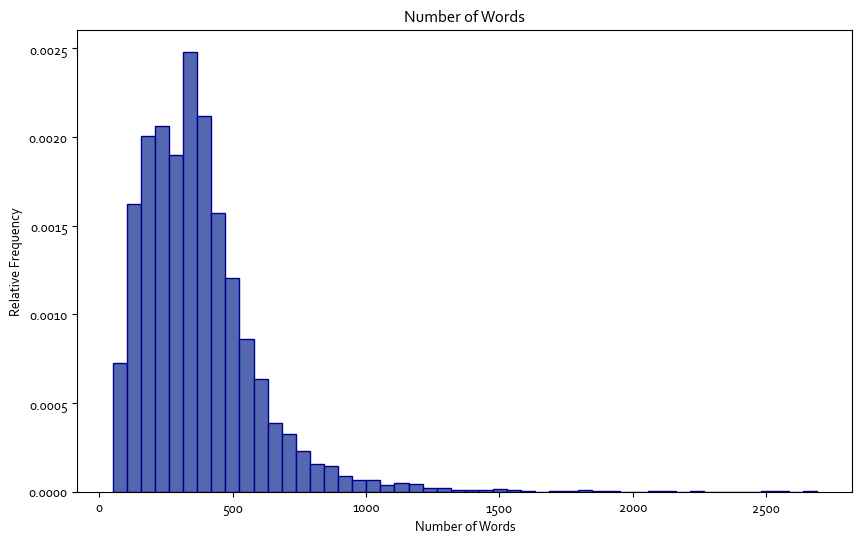

The mean of text length is: 369.79
The std is: 220.31


In [39]:
print("The maximum number of words is: %d"%max(df["Number of Words"]))
print("The minimum number of words is: %d"%min(df["Number of Words"]))
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Number of Words")
df["Number of Words"].hist(bins=50,density=True,rwidth=1,color='#5368b0',edgecolor='DarkBlue',grid=False)
ax.set_xlabel("Number of Words")
ax.set_ylabel("Relative Frequency")
plt.show()
print("The mean of text length is: %.2f"%df["Number of Words"].mean())
print("The std is: %.2f"%df["Number of Words"].std())

In [40]:
#preperations
plt.rcParams.update({"font.family": "Corbel", "font.size":15})
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"

#### Scatterplot- number of words in fake vs. real news <a class="anchor" id="scatter"></a>
[custom scatterplot- reference](https://www.python-graph-gallery.com/web-scatterplot-astronaut)

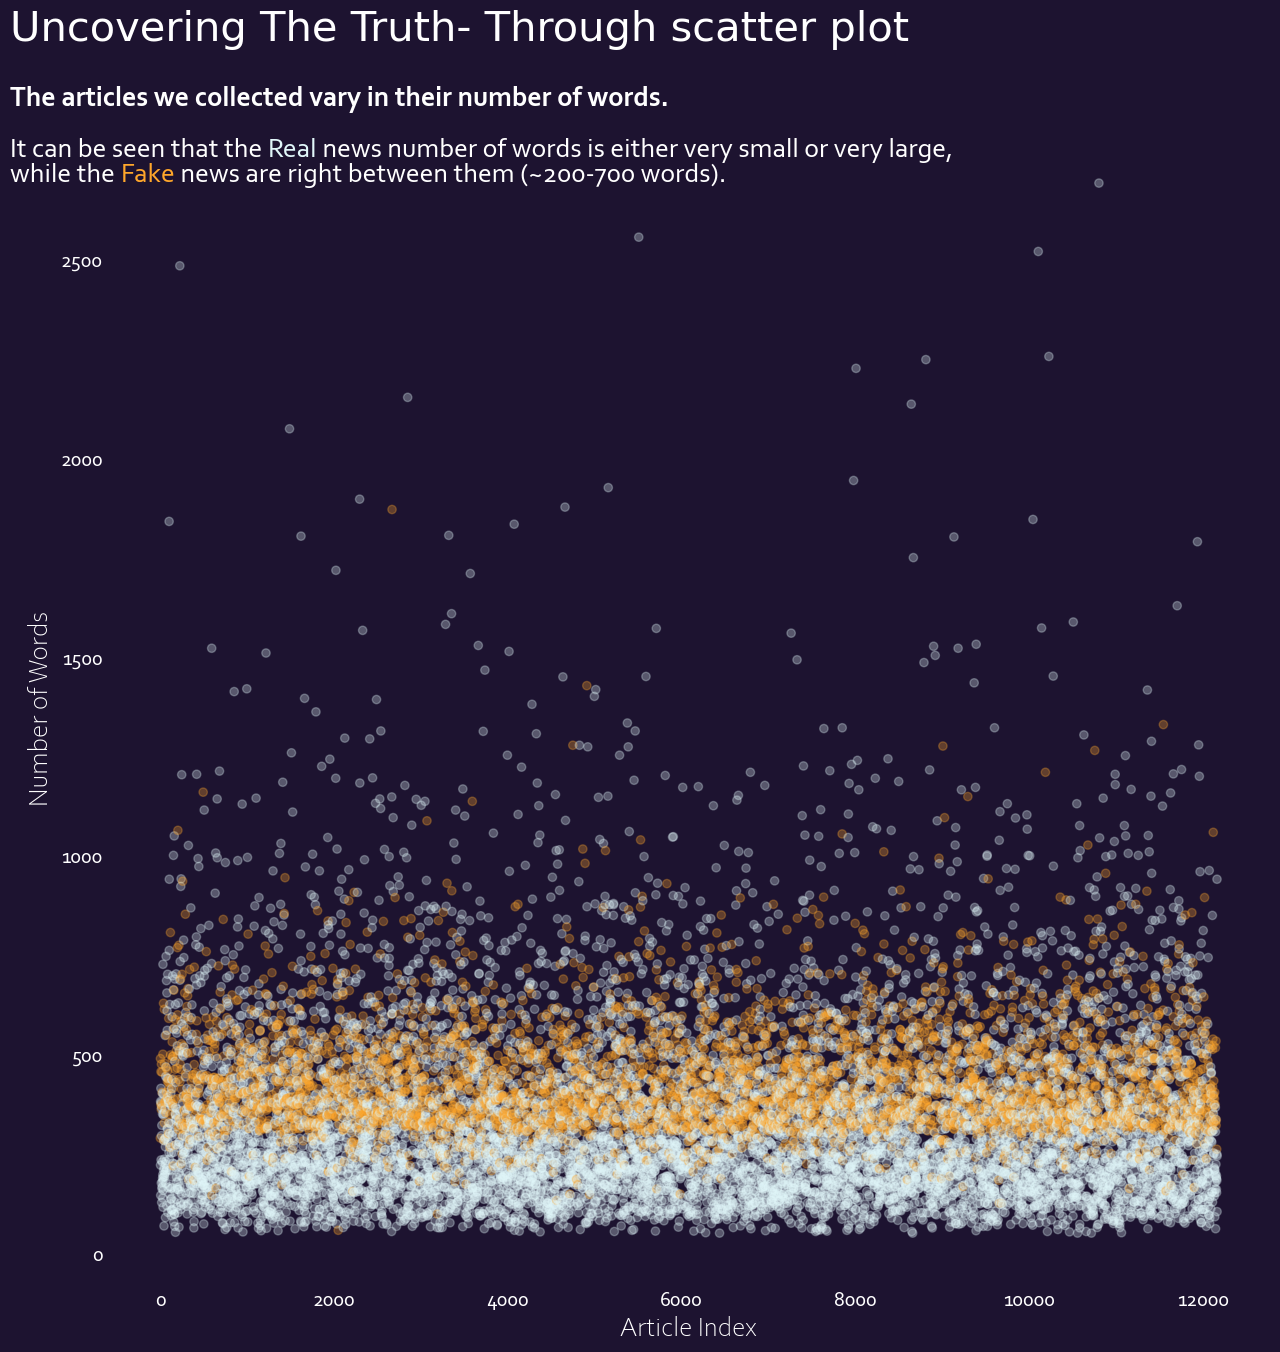

In [41]:
v_axis = df['Number of Words'].values
h_axis = df["Number of Words"].index
color = df["Fake or Real News"].values
DARKBLUE = "#1d1330"
ORANGE = "#ffa72b"
LIGHTBLUE = "#e1f7fa"

colors = np.where(color == 0, LIGHTBLUE, ORANGE)

fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor(DARKBLUE)
fig.set_facecolor(DARKBLUE)
ax.scatter(h_axis, v_axis, c=colors, alpha = 0.3);



# Add title
fig.text(
    0.06, 0.94, "Uncovering The Truth- Through scatter plot", 
   fontsize=30, fontname="DejaVu Sans", va="baseline"
)

# Add subtitle
subtitle = """<size:20><weight:bold>The articles we collected vary in their number of words.</> 

<weight:normal>It can be seen that the <color:#e1f7fa>Real</> news number of words is either very small or very large,
while the <color:#ffa72b>Fake</> news are right between them (~200-700 words).</></>
"""  



flexitext(0.06, 0.91, subtitle, va="top", xycoords="figure fraction", ax=ax)
# Remove frame (or all the spines at the same time)
ax.set_frame_on(False)

# Set a label for the horizontal axis
ax.set_xlabel("Article Index", size=20, weight="light")
ax.set_ylabel("Number of Words", size=20, weight="light")
# Remove tick marks from both axes
ax.tick_params(length=0)


**Common words in dataset prior to cleaning**                                     
What are the most commons terms in our dataset? Let's find out!

In [42]:
# #split text to words
# all_words = text.split()
# print("There are",len(all_words),"words in the whole dataframe! (prior to cleaning)")
# print("Let's view the first 50 words:")
# all_words[:50]
plt.rcParams.update({"font.family": "Corbel"})
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["xtick.labelcolor"] = "black"
plt.rcParams["ytick.labelcolor"] = "black"

We will use Tfidf Vectorizer to tokenize the text, and create a dictionary with the frequencies for each word..

In [43]:
text = ' '.join([text for text in df["Text"]])
vectorizer = TfidfVectorizer() 
freq_vec = vectorizer.fit_transform([text]).toarray()  # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names_out(),freq_vec.sum(axis=0))) # create a dictionary from all rows
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
freqDist

{'the': 0.650876288031386,
 'to': 0.3579587674808568,
 'and': 0.3047928793650624,
 'of': 0.25135509751210017,
 'in': 0.21580099294010385,
 'that': 0.19023498477171155,
 'he': 0.1250258034743097,
 'is': 0.12115531615698037,
 'it': 0.12111533178386746,
 'for': 0.12093940054217067,
 'on': 0.1092746260926988,
 'was': 0.10093655148622074,
 'with': 0.09403258306205892,
 'his': 0.08293558671079031,
 'trump': 0.07889183377663839,
 'as': 0.0671844093291794,
 'said': 0.06715242183068908,
 'this': 0.06299404702694683,
 'be': 0.062346300182517744,
 'you': 0.06113077523988539,
 'we': 0.05893163471867554,
 'have': 0.05610607235203016,
 'they': 0.05351508497431383,
 'at': 0.05329383810975575,
 'not': 0.05285667563038797,
 'are': 0.049679250780349016,
 'but': 0.04918344455374898,
 'has': 0.04771468524806822,
 'she': 0.046779050917226214,
 'from': 0.04429735415935183,
 'by': 0.0437535666850163,
 'an': 0.04044286059126766,
 'who': 0.04041087309277733,
 'her': 0.038747523171280426,
 'about': 0.0379718263

### Word Distribution Bar Plot <a class="anchor" id="barplotworddist"></a>

25 most frequent words:


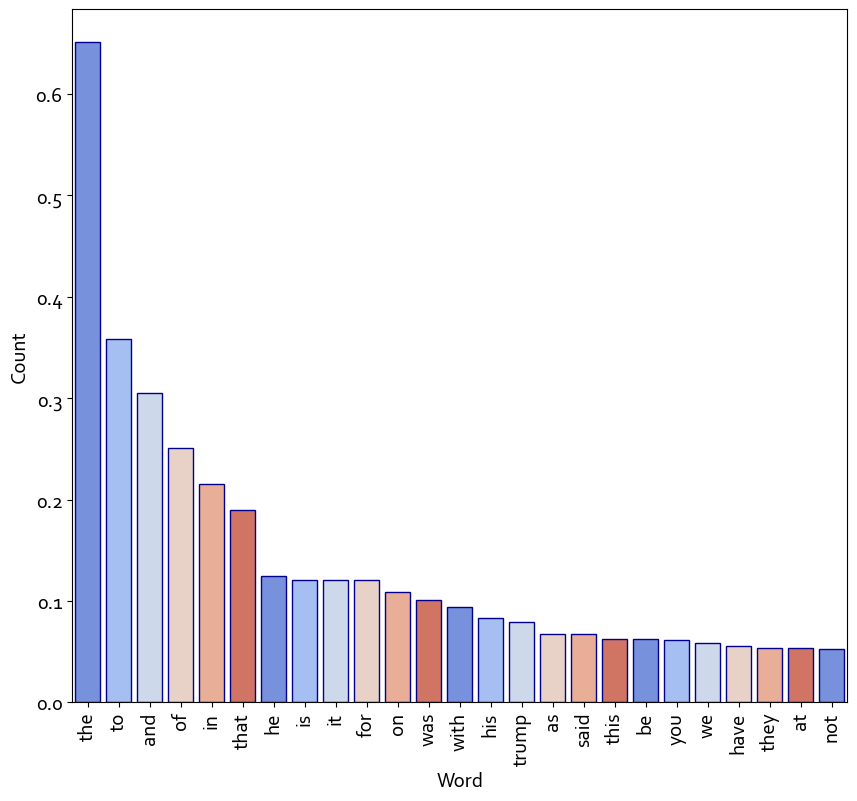

In [44]:
print("25 most frequent words:")
topK = 25
plt.figure(figsize=(10,9))
d = pd.DataFrame({'Word':list(freqDist.keys())[:topK],'Count':list(freqDist.values())[:topK]})
ax = sns.barplot(data=d,x="Word",y="Count",palette=sns.color_palette("coolwarm"),edgecolor='DarkBlue')
plt.xticks(rotation='vertical')
plt.show()

This is useful to see the top words and their relative frequencies. However, it's harder to present a larger set of words.\
A common method to present larger word sets, is WordCloud:

### WordCloud <a class="anchor" id="wordcloud"></a>

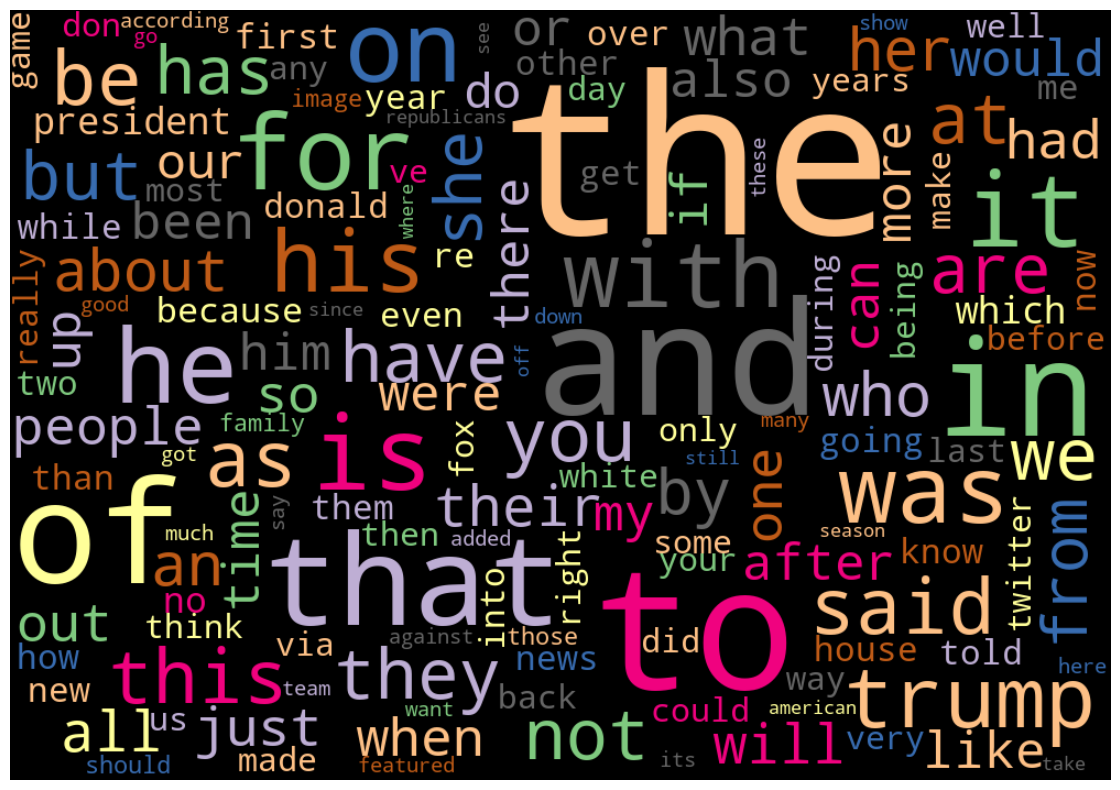

In [45]:
wordcloud = WordCloud(width=1000,height=700,max_font_size=200, max_words=150,colormap="Accent", background_color="black").generate_from_frequencies(freqDist)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's make it more interesting... Maybe in a shape of a megaphone!

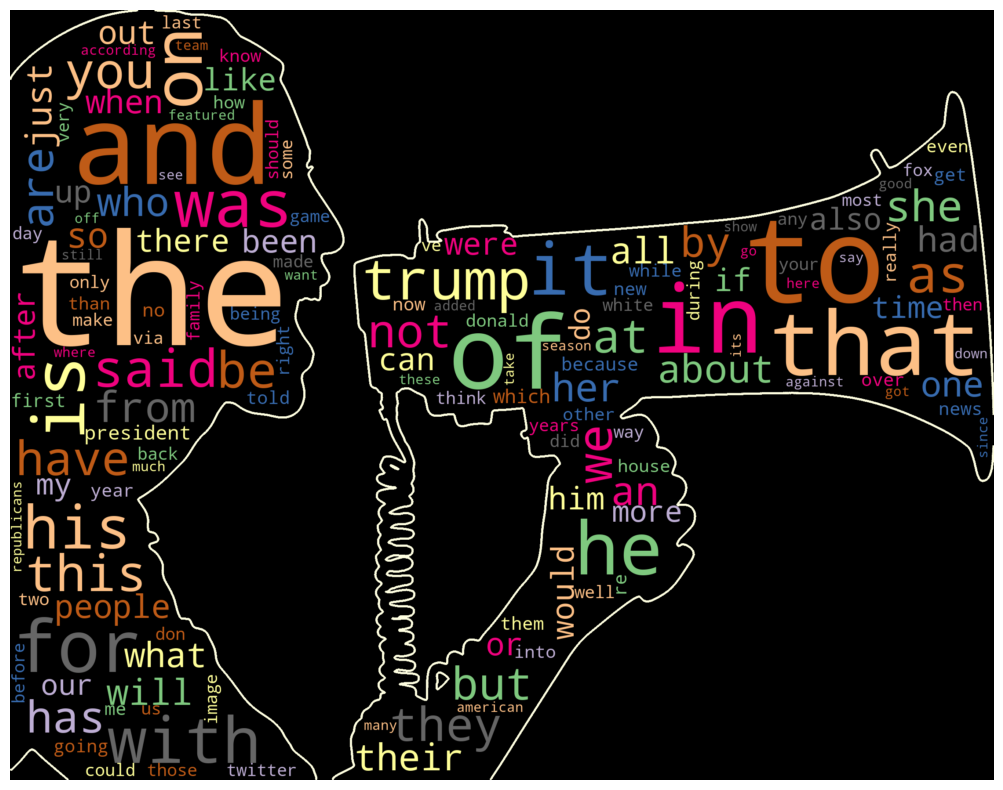

In [46]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

    
image_file=Image.open("mega.png")
image_file=image_file.convert('1')
megaphone_mask = np.array(image_file)

transformed_megaphone_mask = np.ndarray((megaphone_mask.shape[0],megaphone_mask.shape[1]), np.int32)

for i in range(len(megaphone_mask)):
    transformed_megaphone_mask[i] = list(map(transform_format, megaphone_mask[i]))

wc = WordCloud(colormap="Accent", background_color="black", max_words=150, mask=transformed_megaphone_mask, contour_width=4.5, contour_color='#FEFEE0')

wc=wc.generate_from_frequencies(freqDist)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Donut Chart <a class="anchor" id="donut"></a>
[reference](https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215)

In [47]:
n = 30
pal = list(sns.color_palette(palette='rainbow', n_colors=n).as_hex())


fig = px.pie(d, values='Count', names='Word',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

### <font color= '89BBFE'> **STEP #4.2-** EDA on Data After Cleaning </font> <a class="anchor" id="STEP4.2"></a>

 The following steps involvoes:
- converting all words to lowercase.
- removing STOP words.
- removing links.
- removing numbers.
- lemmatization.
- removing punctuation.

Furthermore, in order to gain a more comprehensive understanding of the corpus, we shall re-execute all visualizations that are associated with the Tfidf Vectorizer, thus providing a deeper insight into the characteristics of the data.

In [48]:
def text_preprocessor(text):
    stop_words = set(stopwords.words("english"))
    stop_words2 = ["as", "able", "about", "above", "according", "accordingly", "across", "actually", "after", "afterwards", "again", "against", "ain't", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "are", "aren't", "around", "as", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "b", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "both", "brief", "but", "by", "c", "came", "can", "cannot", "cant", "cause", "causes", "certain", "certainly", "changes", "clearly", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "currently", "d", "definitely", "described", "despite", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "during", "e", "each", "edu", "eg", "eight", "either", "else", "elsewhere", "enough", "entirely", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "far", "few", "fifth", "first", "five", "followed", "following", "follows", "for", "former", "formerly", "forth", "four", "from", "further", "furthermore", "g", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "h", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he's", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "i", "i'd", "i'll", "i'm", "i've", "ie", "if", "ignored"]
    for word in stop_words2:
        stop_words.add(word)
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove links
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www\S+", "", text)
    
    #remove numbers
    text = re.sub(r'\d+', '', text) #we decide that numbers like dates and such are irrelevant for text analysis. 
    #might change later
    
    # Remove stop words
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item
    wordnl = WordNetLemmatizer()
    text =  " ".join([wordnl.lemmatize(word) for word in text.split()])
    
    #remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]','',text)
    return text

In [49]:
cleaned_text = text_preprocessor(text)

In [50]:
vectorizer = TfidfVectorizer(stop_words="english") 
freq_vec = vectorizer.fit_transform([cleaned_text]).toarray()  # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names_out(),freq_vec.sum(axis=0))) # create a dictionary from all rows
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
freqDist

{'trump': 0.4669853511433798,
 'said': 0.37160766917746363,
 'people': 0.17998097013280143,
 'time': 0.16473260565827863,
 'like': 0.16267156298754643,
 'year': 0.12460092113467194,
 'president': 0.12327716202094964,
 'new': 0.11354166777952354,
 'know': 0.11225142155475623,
 'news': 0.10952012110492412,
 'told': 0.10935255666014915,
 'image': 0.10497912465152229,
 'donald': 0.10137648908886031,
 'think': 0.10067271842080541,
 'house': 0.09770682774828834,
 'make': 0.09484147574263625,
 'republican': 0.08701621617164489,
 'say': 0.08678162594895993,
 'day': 0.08512273794568767,
 'want': 0.0841676206104703,
 'white': 0.08354763216480289,
 'state': 0.0821903601621256,
 'thing': 0.08180496193914315,
 'fox': 0.07825259570991366,
 'american': 0.0779509797093187,
 'way': 0.07746504281947128,
 'right': 0.0766272205955964,
 'game': 0.07458293436934169,
 'really': 0.07364457347860183,
 'family': 0.06990788636011987,
 'team': 0.06250153790106594,
 'life': 0.05928430056138641,
 'good': 0.05831242

### Word Distribution Bar Plot <a class="anchor" id="barplotworddist2"></a>

25 most frequent words:


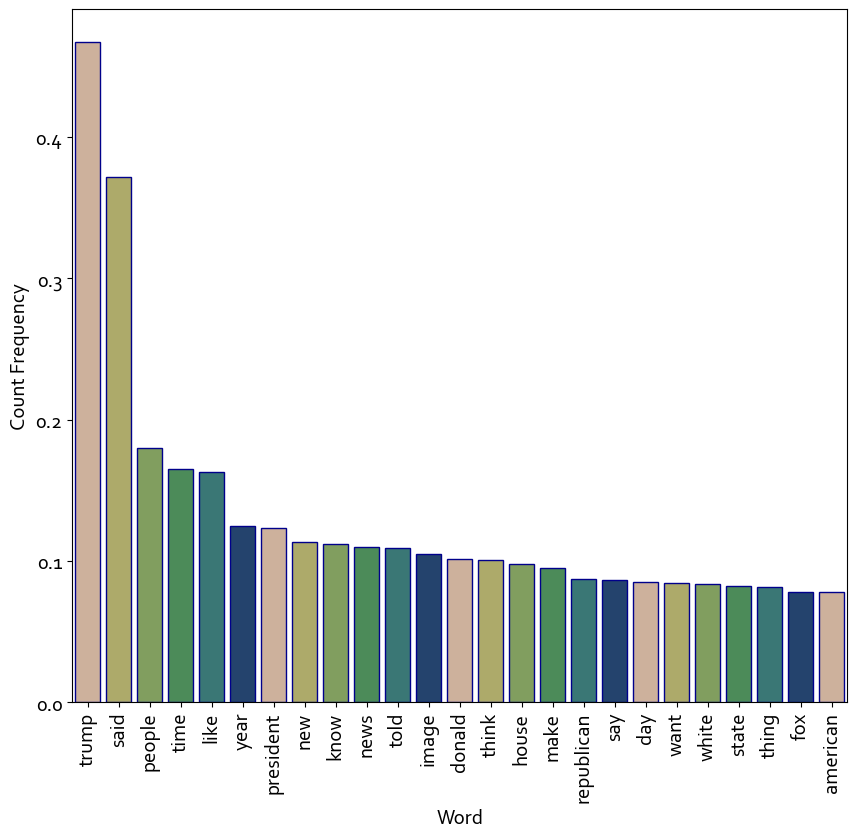

In [51]:
print("25 most frequent words:")
topK = 25
plt.figure(figsize=(10,9))
d = pd.DataFrame({'Word':list(freqDist.keys())[:topK],'Count Frequency':list(freqDist.values())[:topK]})
ax = sns.barplot(data=d,x="Word",y="Count Frequency",palette=sns.color_palette("gist_earth_r"),edgecolor='DarkBlue')
plt.xticks(rotation='vertical')
plt.show()

### WordCloud <a class="anchor" id="wordcloud2"></a>

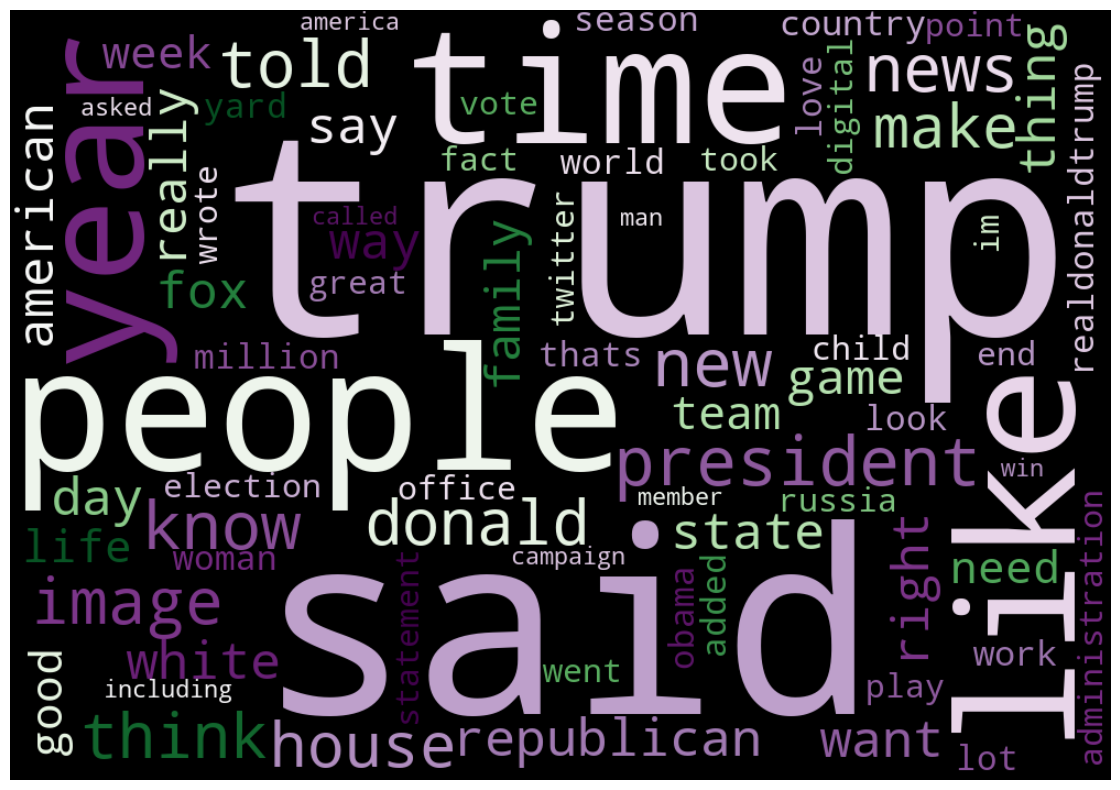

In [52]:
wordcloud = WordCloud(width=1000,height=700,max_font_size=260, max_words=75,colormap="PRGn", background_color="black").generate_from_frequencies(freqDist)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

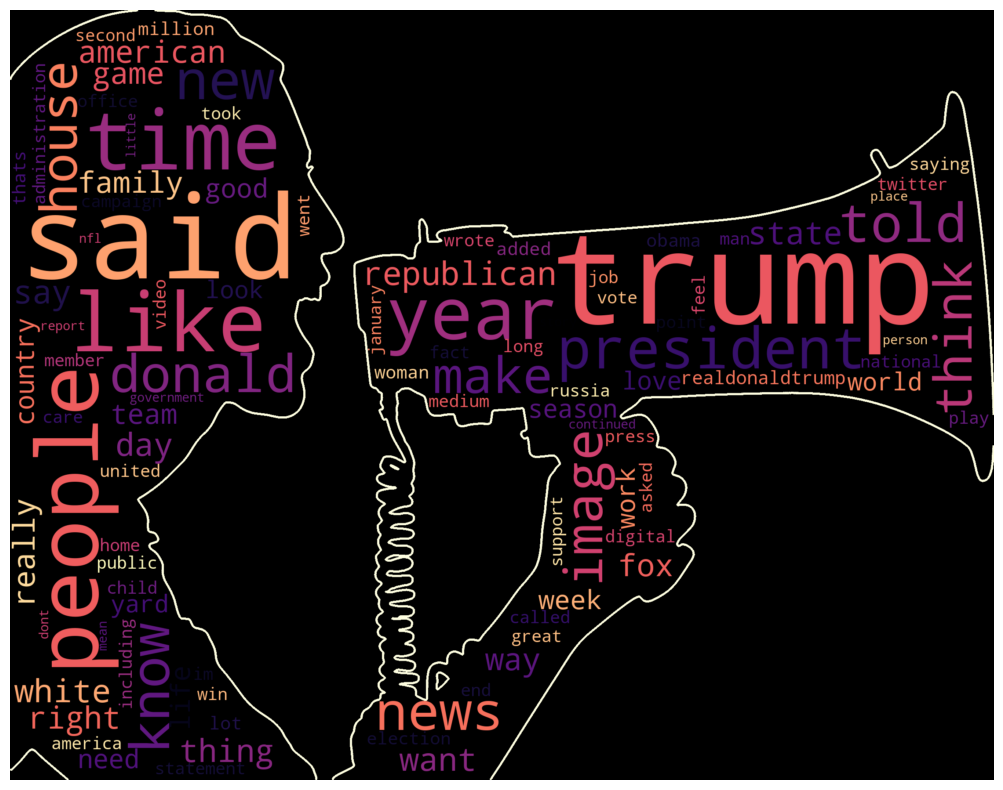

In [53]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

    
image_file=Image.open("mega.png")
image_file=image_file.convert('1')
megaphone_mask = np.array(image_file)

transformed_megaphone_mask = np.ndarray((megaphone_mask.shape[0],megaphone_mask.shape[1]), np.int32)

for i in range(len(megaphone_mask)):
    transformed_megaphone_mask[i] = list(map(transform_format, megaphone_mask[i]))

wc = WordCloud(colormap="magma_r", background_color="black", max_words=100, mask=transformed_megaphone_mask,contour_width=4.5, contour_color = '#FEFEE0')

wc=wc.generate_from_frequencies(freqDist)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Donut Chart <a class="anchor" id="donut2"></a>

In [54]:
n = 30
pal = list(sns.color_palette(palette='gist_earth_r', n_colors=n).as_hex())


fig = px.pie(d, values='Count Frequency', names='Word',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

## Update the data frame using the text processor for machine learning purposes

In [55]:
df_processed = df.copy()   

In [56]:
df_processed.head()

Title  \
0   Here’s What We ALL Need To Do If Trump Moves ...   
1   Trump Blames Overseas Mistakes On ‘Exhaustion...   
2  K-pop group BTS to enlist in South Korean mili...   
3  ICE deports Afghan evacuee who sexually abused...   
4  Christmas Eve sees another day of bitter cold,...   

                                                Text  Number of Words  \
0  Now that Special Counsel Robert Mueller is abo...            289.0   
1  The good news: Trump slowly read through his p...            489.0   
2  Jin, the oldest member of the group, will be t...            221.0   
3  Tariq Mohammad Intezar, a 25-year-old Afghan, ...            381.0   
4  An additional 1,123 flights have been delayed ...            145.0   

   Fake or Real News  
0                  1  
1                  1  
2                  0  
3                  0  
4                  0

In [57]:
for idx, row in df_processed.iterrows():
    df_processed.iloc[idx,0] = text_preprocessor(row['Title'])
    df_processed.iloc[idx,1] = text_preprocessor(row['Text'])

In [58]:
df_processed.head()

Title  \
0  heres need trump move fire mueller shut russia...   
1  trump blame overseas mistake exhaustion  clint...   
2  kpop group bts enlist south korean military ma...   
3  ice deports afghan evacuee sexually abused yea...   
4  christmas eve see day bitter cold harsh weathe...   

                                                Text  Number of Words  \
0  special counsel robert mueller indict someone ...            289.0   
1  good news trump slowly read prepared remark fr...            489.0   
2  jin oldest member group one enlist yearold del...            221.0   
3  tariq mohammad intezar yearold afghan paroled ...            381.0   
4  additional  flight delayed time reportas frida...            145.0   

   Fake or Real News  
0                  1  
1                  1  
2                  0  
3                  0  
4                  0

In [59]:
df_processed.to_csv('df_processed.csv', index=False)

## <font color='DarkTurquoise'>**STEP #5- Advanced Data Analysis** </font> <a class="anchor" id="STEP5"></a>

Choosing appropriate methods and algorithms. (supervised learning- classification using TF-IDF vectorizer and logistic regression)

**The algorithms we chose are:**
- Logistic Regression 
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Random Forest
- Bonus model: Neural Networks

In [32]:
def CreateModel_Fit_Predict(model_name,X_train, X_test, y_train, y_test):
    # Train a classifier on the training data
    if model_name == 'Logistic Regression':
        clf = LogisticRegression(C=0.1, penalty='l2')
    elif model_name == "Gaussian Naive Bayes":
        clf = GaussianNB()
    elif model_name == "Multinomial Naive Bayes":
        clf = MultinomialNB()
    elif model_name == "Random Forest":
        clf = RandomForestClassifier(n_estimators=10,random_state=0) #low number of trees to prevent overfitting
        
    clf.fit(X_train, y_train)

    # Predict on the train and test data
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)
  
    # Calculate evaluation metrics
    train_acc = metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
    test_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    return (model_name, train_acc, test_acc, precision, recall, f1, confusion_matrix)

In [33]:
df_processed = pd.read_csv("df_processed.csv")

In [34]:
df_processed.head()

Title  \
0  heres need trump move fire mueller shut russia...   
1  trump blame overseas mistake exhaustion  clint...   
2  kpop group bts enlist south korean military ma...   
3  ice deports afghan evacuee sexually abused yea...   
4  christmas eve see day bitter cold harsh weathe...   

                                                Text  Number of Words  \
0  special counsel robert mueller indict someone ...            289.0   
1  good news trump slowly read prepared remark fr...            489.0   
2  jin oldest member group one enlist yearold del...            221.0   
3  tariq mohammad intezar yearold afghan paroled ...            381.0   
4  additional  flight delayed time reportas frida...            145.0   

   Fake or Real News  
0                  1  
1                  1  
2                  0  
3                  0  
4                  0

In [35]:
df_processed.shape

(12166, 4)

In [40]:
#Split the dataset into training and testing sets
X = df_processed["Title"] + df_processed["Text"] #features
y = df_processed["Fake or Real News"] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
# Create a TfidfVectorizer to transform text data into numerical features
vectorizer = TfidfVectorizer()
#fit and tranform the train data, transform the test data
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [42]:
models = ["Logistic Regression", "Gaussian Naive Bayes", "Multinomial Naive Bayes", "Random Forest"]
results = []
for model in models:
    result = CreateModel_Fit_Predict(model,X_train, X_test, y_train, y_test)
    results.append(result)

### Performance Evaluation of the Different Models <a class="anchor" id="modelstable"></a>

In [43]:
resDF = pd.DataFrame(data=results, columns = ["Model Name", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Confusion Matrix"])
resDF2=resDF.style.background_gradient(cmap='Blues',low=0.1,high=0.5)
resDF2 = resDF2.format(precision=2)
resDF2

### Heat Maps of the Different Models <a class="anchor" id="heatmaps"></a>

Heat Maps:


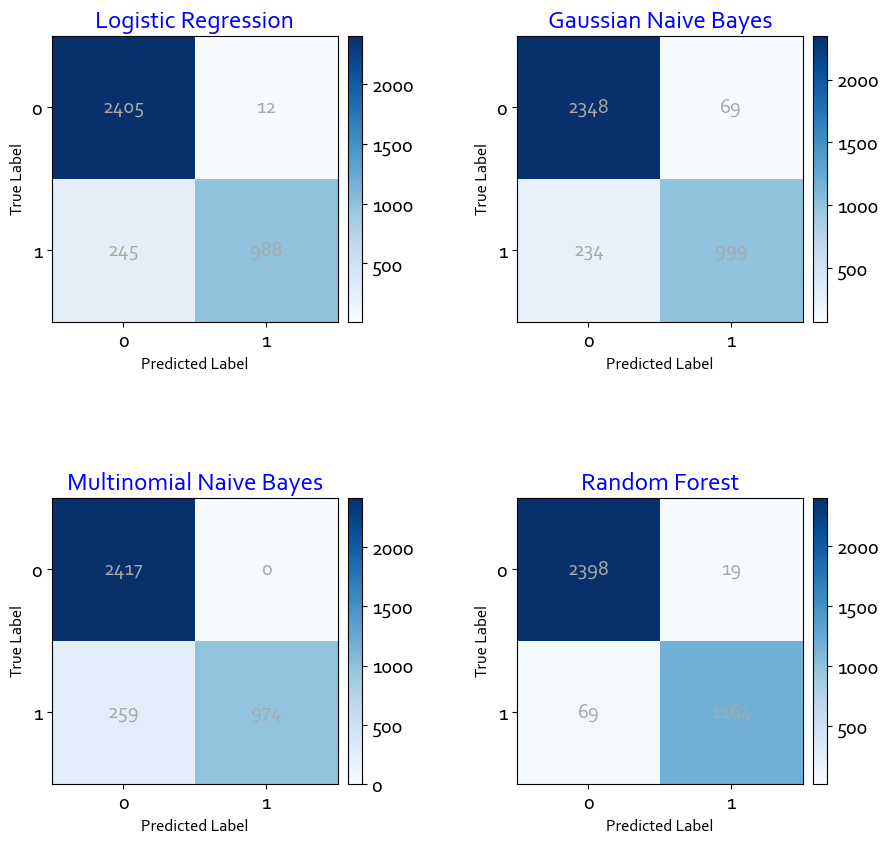

In [129]:
print("Heat Maps:")
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), gridspec_kw={'wspace':0.5, 'hspace':0.5})
for idx, ax in enumerate(axes.ravel()):
    #heat maps display
    mat = resDF.iloc[idx,6]
    im = ax.imshow(mat, cmap = 'Blues')
    ax.set_title(resDF.iloc[idx,0], color="blue")
    #colorbars
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1) 
    plt.colorbar(im, cax=cax)
    #annotations
    for (j,i),label in np.ndenumerate(mat):
        ax.text(i,j,label,ha='center',va='center', fontsize=15, color='darkgray')
    #labels
    ax.set_xticks([0, 1]) #binary classification
    ax.set_yticks([0, 1]) #fake=1, real=0
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
plt.show()

In [130]:
#create a GNB model so we can test it
#Split the dataset into training and testing sets
X = df_processed["Title"] + df_processed["Text"] #features
y = df_processed["Fake or Real News"] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Create a TfidfVectorizer to transform text data into numerical features
vectorizer = TfidfVectorizer()
#fit and tranform the train data, transform the test data
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
clf = GaussianNB()
clf.fit(X_train, y_train)
# Predict on the train and test data
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

0.916986301369863


In [75]:
new_sample = ["The government has announced that unicorns are real and can be found in the nearby forest."] #fake
# new_sample = ["The World Health Organization announces\
#              that the COVID-19 vaccine is safe and effective\
#              in preventing the spread of the virus."] #real
# Preprocess the new sample text
new_sample = [text_preprocessor(text) for text in new_sample]

# Vectorize the preprocessed sample text
new_sample_vectors = vectorizer.transform(new_sample)

# Predict the class of the new sample
y_pred = clf.predict(new_sample_vectors.toarray())

# Get the class probabilities
y_prob = clf.predict_proba(new_sample_vectors.toarray())

if y_pred[0]==1:
    print("Predicted class: Fake")
    print("Probability of prediction: {:.2f}%".format(y_prob[0][1]*100))
else:
    print("Predicted class: Real")
    print("Probability of prediction: {:.2f}%".format(y_prob[0][0]*100))

Predicted class: Fake
Probability of prediction: 100.00%


# GLOSSARY no. 1

ID | TERM      | DEFINITION
--|:---------:|:-----------:
1|**Accuracy**      | The proportion of correct predictions made by the model over all predictions.
2|**Precision**   | The fraction of positive predictions that are actually correct.
3|**Recall** | The fraction of positive instances that were correctly predicted by the model.
4|**F1 Score** | The harmonic mean of precision and recall, and it provides a balance between precision and recall.

## <font color = #9A32CD> BONUS MODEL: Our Neural Network Model </font>⭐<a class="anchor" id="neuralnetworks"></a>
Uses a **transformer-based neural network using BERT preprocessor and encoder** from TensorFlow Hub and the architecture consists of an input layer, BERT layers, fully connected layers, and an output layer with sigmoid activation. The model is compiled using Adam optimizer, binary cross-entropy loss, and accuracy metrics and trained for 5 epochs.  

[reference](https://www.analyticsvidhya.com/blog/2022/03/fake-news-classification-using-deep-learning/)

-------------------------------------------------------------------------------------------------
STEPS:
* **Splits the data** into train and test sets with a 80/20 split ratio.
* **Loads the BERT preprocessor and encoder** from TensorFlow Hub, to be used in the nueral network.
* **Builds a Neural Network** which consists of input and BERT layers, followed by 2 fully
connected layers with dropout and activation functions.   
    * The **Dropout Layer** helps prevent overfitting,
    * The **Activation Functions** determine the output of each layer.
* **Compiles the Model** with the Adam optimizer, binary cross entropy loss function, and accuracy metrics. 
* **Trains the Model** in 5 epochs on the training data.
* **Evaluates the Model** on the test data.
-------------------------------------------------------------------------------------------------

## GLOSSARY no. 2

ID | TERM      | DEFINITION
--|:---------:|:-----------:
1|**TensorFlow**      | An open-source software library for dataflow and differentiable programming across a range of tasks.      
2|**TensorFlow Hub**   | A library for the publication, discovery, and consumption of reusable parts of machine learning models.
3|**Keras** | An open-source software library for building and training deep learning models.
4|**Tokenizer** | A preprocessing tool for converting text into numerical data, such as converting words into integers.
5|**Pad Sequences** | A preprocessing tool for making the length of sequences (e.g., text) equal, by adding padding to the end of sequences if needed.
6|**Sequential Model** | A type of deep learning model that represents a linear stack of layers.
7|**Embedding Layer** | A layer in a deep learning model that maps categorical variables (e.g., words) into continuous vectors.
8|**Dense Layer** | A type of layer in a deep learning model that applies a dense matrix multiplication to the input data.
9|**Dropout Layer** | A type of layer in a deep learning model that randomly sets a portion of the input units to 0 during training to reduce overfitting.
10|**Regularization** | A technique for avoiding overfitting by adding a penalty term to the loss function of the model.
11|**Early Stopping** | A technique for avoiding overfitting by monitoring the performance of the model on a validation set and stopping the training process when performance no longer improves.
12| **Adam Optimizer** | A type of gradient-based optimization algorithm for deep learning models that adapts the learning rate on a per-parameter basis.
13|**Binary Cross-Entropy Loss** | A loss function for binary classification problems that measures the difference between the predicted probabilities and the true labels.
14|**Accuracy Metric** | A measure of the performance of a machine learning model, defined as the ratio of correct predictions to the total number of predictions.
15|**BERT** | Bidirectional Encoder Representations from Transformers) is a pre-trained language model developed by Google, designed to perform a wide range of natural language processing (NLP) tasks such as sentiment analysis, question answering, and text classification. BERT's architecture, based on the Transformer network, allows it to process and understand context from both the left and right sides of a token, leading to state-of-the-art results on many NLP benchmarks.
16| **BERT Preprocessor**|A preprocessor for text data that prepares the input text for encoding by BERT.
17| **BERT Encoder**| A transformer-based neural network architecture for encoding text data into a numerical representation that can be used for various natural language processing tasks.
18| **Input Layer**| The first layer of a deep learning model, which takes the raw input data and passes it through the network.
19| **Pooled Output**| A layer in the BERT Encoder that summarizes the sequence representation by taking the hidden state corresponding to the first token (i.e., [CLS]) and feeding it through a fully connected layer.
20| **Fully Connected Layer** | A type of layer in a deep learning model that applies a dense matrix multiplication to the input data.
21| **Hidden Layer** | An intermediate layer in a deep learning model, whose outputs are passed to the next layer in the network.
22| **Output Layer** | The final layer of a deep learning model, which generates the prediction for the input.

In [188]:
#Split the data into train and test
X = df_processed["Title"] + df_processed["Text"] #features
y = df_processed["Fake or Real News"] #target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

#Load BERT preprocessor and encoder from tensorflow_hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") 
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

#WE CAN NOW WORK ON OUR NEURAL NETWORK
# Input Layers
input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

# BERT layers
processed = bert_preprocess(input_layer)
output = bert_encoder(processed) #the output of the encoder is binary code

# Fully Connected Layers
layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(10,activation='relu', name='hidden')(layer)
layer = tf.keras.layers.Dense( 1,activation='sigmoid', name='output')(layer)


model1 = tf.keras.Model(inputs=[input_layer],outputs=[layer])

#Compile model on adam optimizer, binary_crossentropy loss, and accuracy metrics
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Train model on 5 epochs
model1.fit(X_train, y_train, epochs= 5)

#Evaluate model on test data
model1.evaluate(X_test,y_test) #returns [loss val, acc val]

Epoch 1/5
305/305 [==============================] - 1812s 6s/step - loss: 0.4959 - accuracy: 0.7264
Epoch 2/5
305/305 [==============================] - 1791s 6s/step - loss: 0.3853 - accuracy: 0.8424
Epoch 3/5
305/305 [==============================] - 1777s 6s/step - loss: 0.3377 - accuracy: 0.8758
Epoch 4/5
305/305 [==============================] - 1779s 6s/step - loss: 0.3177 - accuracy: 0.8818
Epoch 5/5
77/77 [==============================] - 452s 6s/step - loss: 0.2583 - accuracy: 0.9113


[0.2583042085170746, 0.9112572073936462]

In [191]:
# Predict on the train and test data and convert to binary predictions
y_pred_train = (model1.predict(X_train) > 0.5).astype("int32")
y_pred = (model1.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
train_acc = metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
test_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

77/77 [==============================] - 458s 6s/step


In [192]:
# #add the results to resDF
resDF.loc[len(resDF)] = ["BERT-Transformer Neural Network", train_acc, test_acc, precision, recall, f1, confusion_matrix]

### Performance Evaluation of the Different Models <a class="anchor" id="modelstable2"></a>

In [193]:
resDF2 = resDF.style.background_gradient(cmap='Blues',low=0.1,high=0.5)
resDF2 = resDF2.format(precision=2)
resDF2

### Heat Maps of the Different Models <a class="anchor" id="heatmaps2"></a>

Heat Maps:


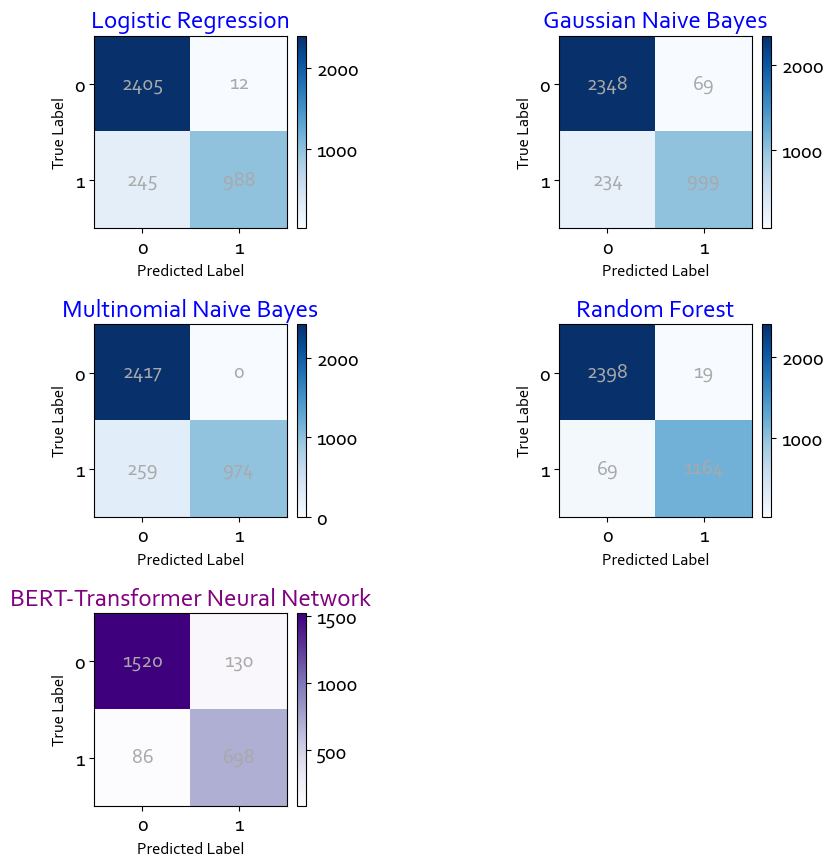

In [350]:
print("Heat Maps:")
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10), gridspec_kw={'wspace':0.5, 'hspace':0.5})
for idx, ax in enumerate(axes.ravel()):
    #heat maps display
    if idx < len(resDF):
        mat = resDF.iloc[idx,6]
        im = ax.imshow(mat, cmap = 'Blues') if idx < len(resDF)-1 else ax.imshow(mat, cmap = 'Purples')
        ax.set_title(resDF.iloc[idx,0], color="blue") if idx < len(resDF)-1 else ax.set_title(resDF.iloc[idx,0], color="purple")
        #colorbars
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1) 
        plt.colorbar(im, cax=cax)
        #annotations
        for (j,i),label in np.ndenumerate(mat):
            ax.text(i,j,label,ha='center',va='center', fontsize=15, color='darkgray')
        #labels
        ax.set_xticks([0, 1]) #binary classification
        ax.set_yticks([0, 1]) #fake=1, real=0
        ax.set_xlabel('Predicted Label', fontsize=12)
        ax.set_ylabel('True Label', fontsize=12)
    else: ax.axis('off')
plt.show()

## <font color='darkblue'>Which is the best model? <a class="anchor" id="bestmodel"></a>
The question of which model is the best is a common one in the field of text classification, particularly with regards to the objective of binary label assignment and avoiding overfitting. Both Logistic Regression and Random Forest have demonstrated effectiveness, as evidenced by their high train and test accuracy scores of 0.93 and 1.00, respectively.
    
However, in an experimental evaluation that involved classifying a distinct and non-representative "fake" news article, the Gaussian Naive Bayes (GNB) model proved to be the most accurate. This superior performance can be attributed to GNB's capacity to process high-dimensional data, as well as its assumption of feature independence, which is frequently a reasonable assumption in text classification problems. Additionally, GNB's computational simplicity and efficiency make it a favored option in situations where large amounts of data or frequent updates to the dataset are present.

   Regarding the BERT-Transformer Neural Network mentioned in the table, it has achieved a test accuracy score of 0.91, with a precision value of 0.84 and a recall value of 0.89, resulting in an overall F1 score of 0.87. While the F1 score is similar to that of the GNB classifier, the GNB model has demonstrated a higher accuracy and precision in the given experiment. Therefore, based on the provided evaluation metrics, it is reasonable to conclude that the GNB model is a better choice than the BERT-Transformer Neural Network for this particular problem.
   
<font color='darkblue'> **In conclusion, the combination of** </font> <font color = 'red'> <u> **GNB's** </u> </font> high-dimensional data handling capabilities, independence assumption, and computational efficiency make it, in our assessment, the **BEST model!** 

In [234]:
new_sample = ["The government has announced that unicorns are real and can be found in the nearby forest."] #fake
# new_sample = ["The World Health Organization announces\
#              that the COVID-19 vaccine is safe and effective\
#              in preventing the spread of the virus."] #real
prediction = (model1.predict(new_sample) > 0.5).astype("int32")
print("Probably Fake") else print("Probably Real")

1/1 [==============================] - 1s 525ms/step
Probably Real


In [270]:
test = pd.DataFrame({'Title':["Unicorns are REAL?"],'Text':["The government has announced that unicorns are real and can be found in the nearby forest."]})
refined_Text = test["Title"] + test["Text"]
model1.predict(refined_Text)

1/1 [==============================] - 1s 512ms/step


array([[0.09121063]], dtype=float32)

In [351]:
#time for testing
test = pd.DataFrame({'Title':["Aliens abducted president trump!", "Covid"],'Text':["aliens abduction is in new t!!!", "The goverment has announced that covid 19 is in japan"]})
test_df = test["Title"] + test["Text"]
prediction = (model1.predict(test_df)>0.5).astype("int32").tolist()
labels = []
for p in prediction:
    if p[0]==1:
        labels.append("Fake")
    else:
        labels.append("Real")
print(labels)

1/1 [==============================] - 1s 881ms/step
['Fake', 'Real']


## <font color='73D0B'> **STEP #6-** Drawing Conclusions and Summary Report </font> <a class="anchor" id="STEP6"></a>

Throughout this project, we **embarked on the challenging task of news article classification.** Our task required a thorough review of the data and meticulous data cleaning to ensure accuracy.  
The scraping part was especially challenging since we had to learn **Selenium** on our own.  

Our efforts resulted in a remarkable 91% accuracy score with the **GNB model**, surpassing our initial expectations.  

In addition, we decided to further expanded our knowledge by implementing a **neural networks model**, which deepened our overall understanding of machine learning techniques.

Overall, this project provided a **valuable learning experience** and highlighted the importance of meticulous data cleaning, preprocessing, and model selection. Despite the challenges involved in news article classification, we were able to achieve a high level of accuracy and deepen our knowledge of machine learning techniques.